# WEEK 2 - G2M insight for Cab Investment firm ( Must for all Specialization)

2 weeks time will be provided to complete this use case.

In Week2 you will be working on code piece while in 3rd week you will be working on model building (if you are planing) and presentation.

Presentation should be presented in the template provided to you in the use case and it should be professional ( remember your audience is non technical and leadership team).

Upload your presentation and code on the github or any other code repo and share the URL with us.

 

Deliverables of Week 2 are:

1. EDA Notebook,

2. Data Intake report

3. EDA recommendation and hypothesis results

 

Model building and deployment is optional.

#### Imports Libraries

In [1]:
import pandas as pd
import datetime
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

#### Uploads Dataset

In [184]:
customer_id = pd.read_csv("dataset/Customer_ID.csv")
cab_data = pd.read_csv("dataset/Cab_Data.csv")
city = pd.read_csv("dataset/City.csv")
transaction_id = pd.read_csv("dataset/Transaction_ID.csv")

weather = pd.read_csv("filtered_weather_2016_2018.csv")

----------------------

# EDA - Exploratory Data Analysis

In [185]:
dataset = [transaction_id,city,cab_data,customer_id]
for _ in dataset:
    print("\n",_.head(4))


    Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash

              City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 

    Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  

    Customer ID Gender  Age  Inc

-------------------------

### Data sets are combined by aggregating them together.

In [186]:
merged_data_outer = pd.merge(cab_data, transaction_id, how="outer", on="Transaction ID")
df_test = pd.merge(merged_data_outer, customer_id, how="outer", on="Customer ID")

In [187]:
df_test.shape, df_test.isnull().sum()

((440098, 12),
 Transaction ID            0
 Date of Travel        80706
 Company               80706
 City                  80706
 KM Travelled          80706
 Price Charged         80706
 Cost of Trip          80706
 Customer ID               0
 Payment_Mode              0
 Gender                    0
 Age                       0
 Income (USD/Month)        0
 dtype: int64)

---------------------------

### Since there are a lot of empty fields, "how=inner" was used to establish data accuracy.

In [188]:
merged_data_inner = pd.merge(cab_data, transaction_id, how="inner", on="Transaction ID")
df = pd.merge(merged_data_inner, customer_id, how="inner", on="Customer ID")

In [189]:
df.shape, df.isnull().sum()

((359392, 12),
 Transaction ID        0
 Date of Travel        0
 Company               0
 City                  0
 KM Travelled          0
 Price Charged         0
 Cost of Trip          0
 Customer ID           0
 Payment_Mode          0
 Gender                0
 Age                   0
 Income (USD/Month)    0
 dtype: int64)

-------------------------

#### Date format was changed and Day, Month and Year columns were added for analysis.

In [190]:
def excel_date_to_datetime(excel_date):
    start_date = datetime.datetime(1900, 1, 1)
    if excel_date < 60:
        delta = datetime.timedelta(days=(excel_date-1))
    else:
        delta = datetime.timedelta(days=(excel_date-2))
    return start_date + delta

df['Date of Travel'] = df['Date of Travel'].apply(excel_date_to_datetime)
df['Day'] = df['Date of Travel'].dt.day
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year
df['Date of Travel'] = df['Date of Travel'].dt.date
df['Date of Travel'] = df['Date of Travel'].apply(lambda x: x.strftime('%Y-%m-%d'))

----------------

#### City names restored to the same format

In [191]:
city_data = {
    'ATLANTA GA': "Atlanta",
    'AUSTIN TX': "Austin",
    'BOSTON MA': "Boston",
    'CHICAGO IL': "Chicago",
    'DALLAS TX': "Dallas",
    'DENVER CO': "Denver",
    'LOS ANGELES CA': "Los Angeles",
    'MIAMI FL': "Miami",
    'NASHVILLE TN': "Nashville",
    'NEW YORK NY': "New York",
    'ORANGE COUNTY': "Orange County",
    'PHOENIX AZ': "Phoenix",
    'PITTSBURGH PA': "Pittsburgh",
    'SACRAMENTO CA': "Sacramento",
    'SAN DIEGO CA': "San Diego",
    'SEATTLE WA': "Seattle",
    'SILICON VALLEY': "Silicon Valley",
    'TUCSON AZ': "Tucson",
    'WASHINGTON DC': "Washington"
}
df["City"]=df["City"].map(city_data)

----------------------------

#### Add the external data and the dataset is ready.

In [193]:
df = pd.merge(df, weather, left_on=['Date of Travel', 'City'], right_on=['Date', 'City'], how='left')
del df["Date"]

In [196]:
df.isnull().sum()

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
Day                        0
Month                      0
Year                       0
Type                  156887
dtype: int64

-----------

#### Empty spaces in the type have been filled

In [200]:
df['YearMonth'] = pd.to_datetime(df['Date of Travel']).dt.strftime('%Y-%m')
most_common_types = df.groupby(['City', 'YearMonth'])['Type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
most_common_types.rename(columns={'Type': 'MostCommonType'}, inplace=True)
df = df.merge(most_common_types, on=['City', 'YearMonth'], how='left')
df['Type'].fillna(df['MostCommonType'], inplace=True)
df.drop(columns=['YearMonth', 'MostCommonType'], inplace=True)

In [202]:
df.dropna(subset=['Type'], inplace=True)

In [204]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Day                   0
Month                 0
Year                  0
Type                  0
dtype: int64

-----------------------

# <<<<< Dataset is ready >>>>>

--------------------

In [217]:
df.to_csv("df_last_one.csv", index=False)
df

Transaction ID Date of Travel     Company     City  KM Travelled  \
0             10000011     2016-01-08    Pink Cab  Atlanta         30.45   
1             10351127     2018-07-21  Yellow Cab  Atlanta         26.19   
2             10412921     2018-11-23  Yellow Cab  Atlanta         42.55   
3             10000012     2016-01-06    Pink Cab  Atlanta         28.62   
4             10320494     2018-04-21  Yellow Cab  Atlanta         36.38   
...                ...            ...         ...      ...           ...   
359386        10439766     2018-12-31  Yellow Cab  Seattle         21.42   
359387        10439790     2018-01-07  Yellow Cab  Seattle         16.66   
359389        10439838     2018-01-04  Yellow Cab   Tucson         19.00   
359390        10439840     2018-01-06  Yellow Cab   Tucson          5.60   
359391        10439846     2018-01-04  Yellow Cab   Tucson         13.30   

        Price Charged  Cost of Trip  Customer ID Payment_Mode  Gender  Age  \
0              370.95      313.6350        29290         Card    Male   28   
1              598.70      317.4228        29290         Cash    Male   28   
2              792.05      597.4020        29290         Card    Male   28   
3              358.52      334.8540        27703         Card    Male   27   
4              721.10      467.1192        27703         Card    Male   27   
...               ...           ...          ...          ...     ...  ...   
359386         342.33      275.0328        36141         Card  Female   21   
359387         261.18      213.9144        38520         Card  Female   42   
359389         303.77      232.5600        41414         Card    Male   38   
359390          92.42       70.5600        41677         Cash    Male   23   
359391         244.65      180.3480        39761         Card  Female   32   

        Income (USD/Month)  Day  Month  Year  Type  
0                    10813    8      1  2016  Rain  
1                    10813   21      7  2018  Rain  
2                    10813   23     11  2018  Rain  
3                     9237    6      1  2016  Rain  
4                     9237   21      4  2018  Rain  
...                    ...  ...    ...   ...   ...  
359386               14944   31     12  2018  Rain  
359387               19417    7      1  2018  Rain  
359389                3960    4      1  2018  Rain  
359390               19454    6      1  2018  Rain  
359391               10128    4      1  2018  Rain  

[317018 rows x 16 columns]

In [3]:
df = pd.read_csv("df_last_one__saturday.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317018 entries, 0 to 317017
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      317018 non-null  int64  
 1   Date of Travel      317018 non-null  object 
 2   Company             317018 non-null  object 
 3   City                317018 non-null  object 
 4   KM Travelled        317018 non-null  float64
 5   Price Charged       317018 non-null  float64
 6   Cost of Trip        317018 non-null  float64
 7   Customer ID         317018 non-null  int64  
 8   Payment_Mode        317018 non-null  object 
 9   Gender              317018 non-null  object 
 10  Age                 317018 non-null  int64  
 11  Income (USD/Month)  317018 non-null  int64  
 12  Day                 317018 non-null  int64  
 13  Month               317018 non-null  int64  
 14  Year                317018 non-null  int64  
 15  Type                317018 non-nul

In [5]:
corry = df[["KM Travelled","Price Charged","Cost of Trip","Age","Income (USD/Month)"]]
corry.corr()

KM Travelled  Price Charged  Cost of Trip       Age  \
KM Travelled            1.000000       0.833313      0.981938 -0.000214   
Price Charged           0.833313       1.000000      0.858968 -0.003700   
Cost of Trip            0.981938       0.858968      1.000000 -0.000042   
Age                    -0.000214      -0.003700     -0.000042  1.000000   
Income (USD/Month)     -0.000448       0.004157     -0.000274  0.003579   

                    Income (USD/Month)  
KM Travelled                 -0.000448  
Price Charged                 0.004157  
Cost of Trip                 -0.000274  
Age                           0.003579  
Income (USD/Month)            1.000000

------------------

# Features & Visualization

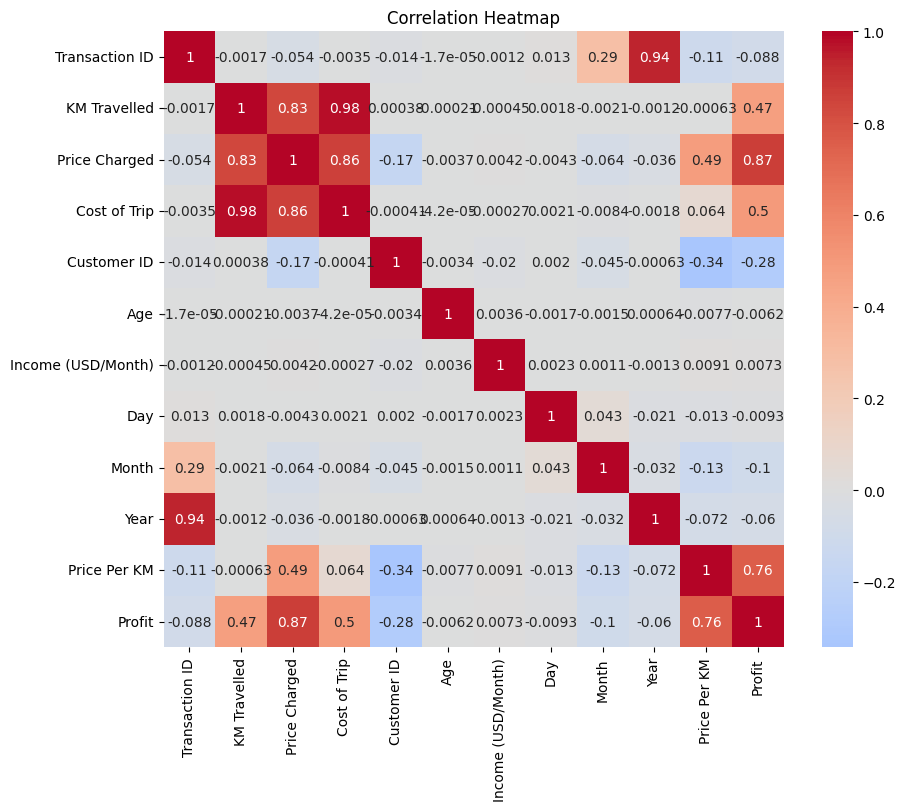

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap')
plt.savefig("visualization/correlation.png")
plt.show()

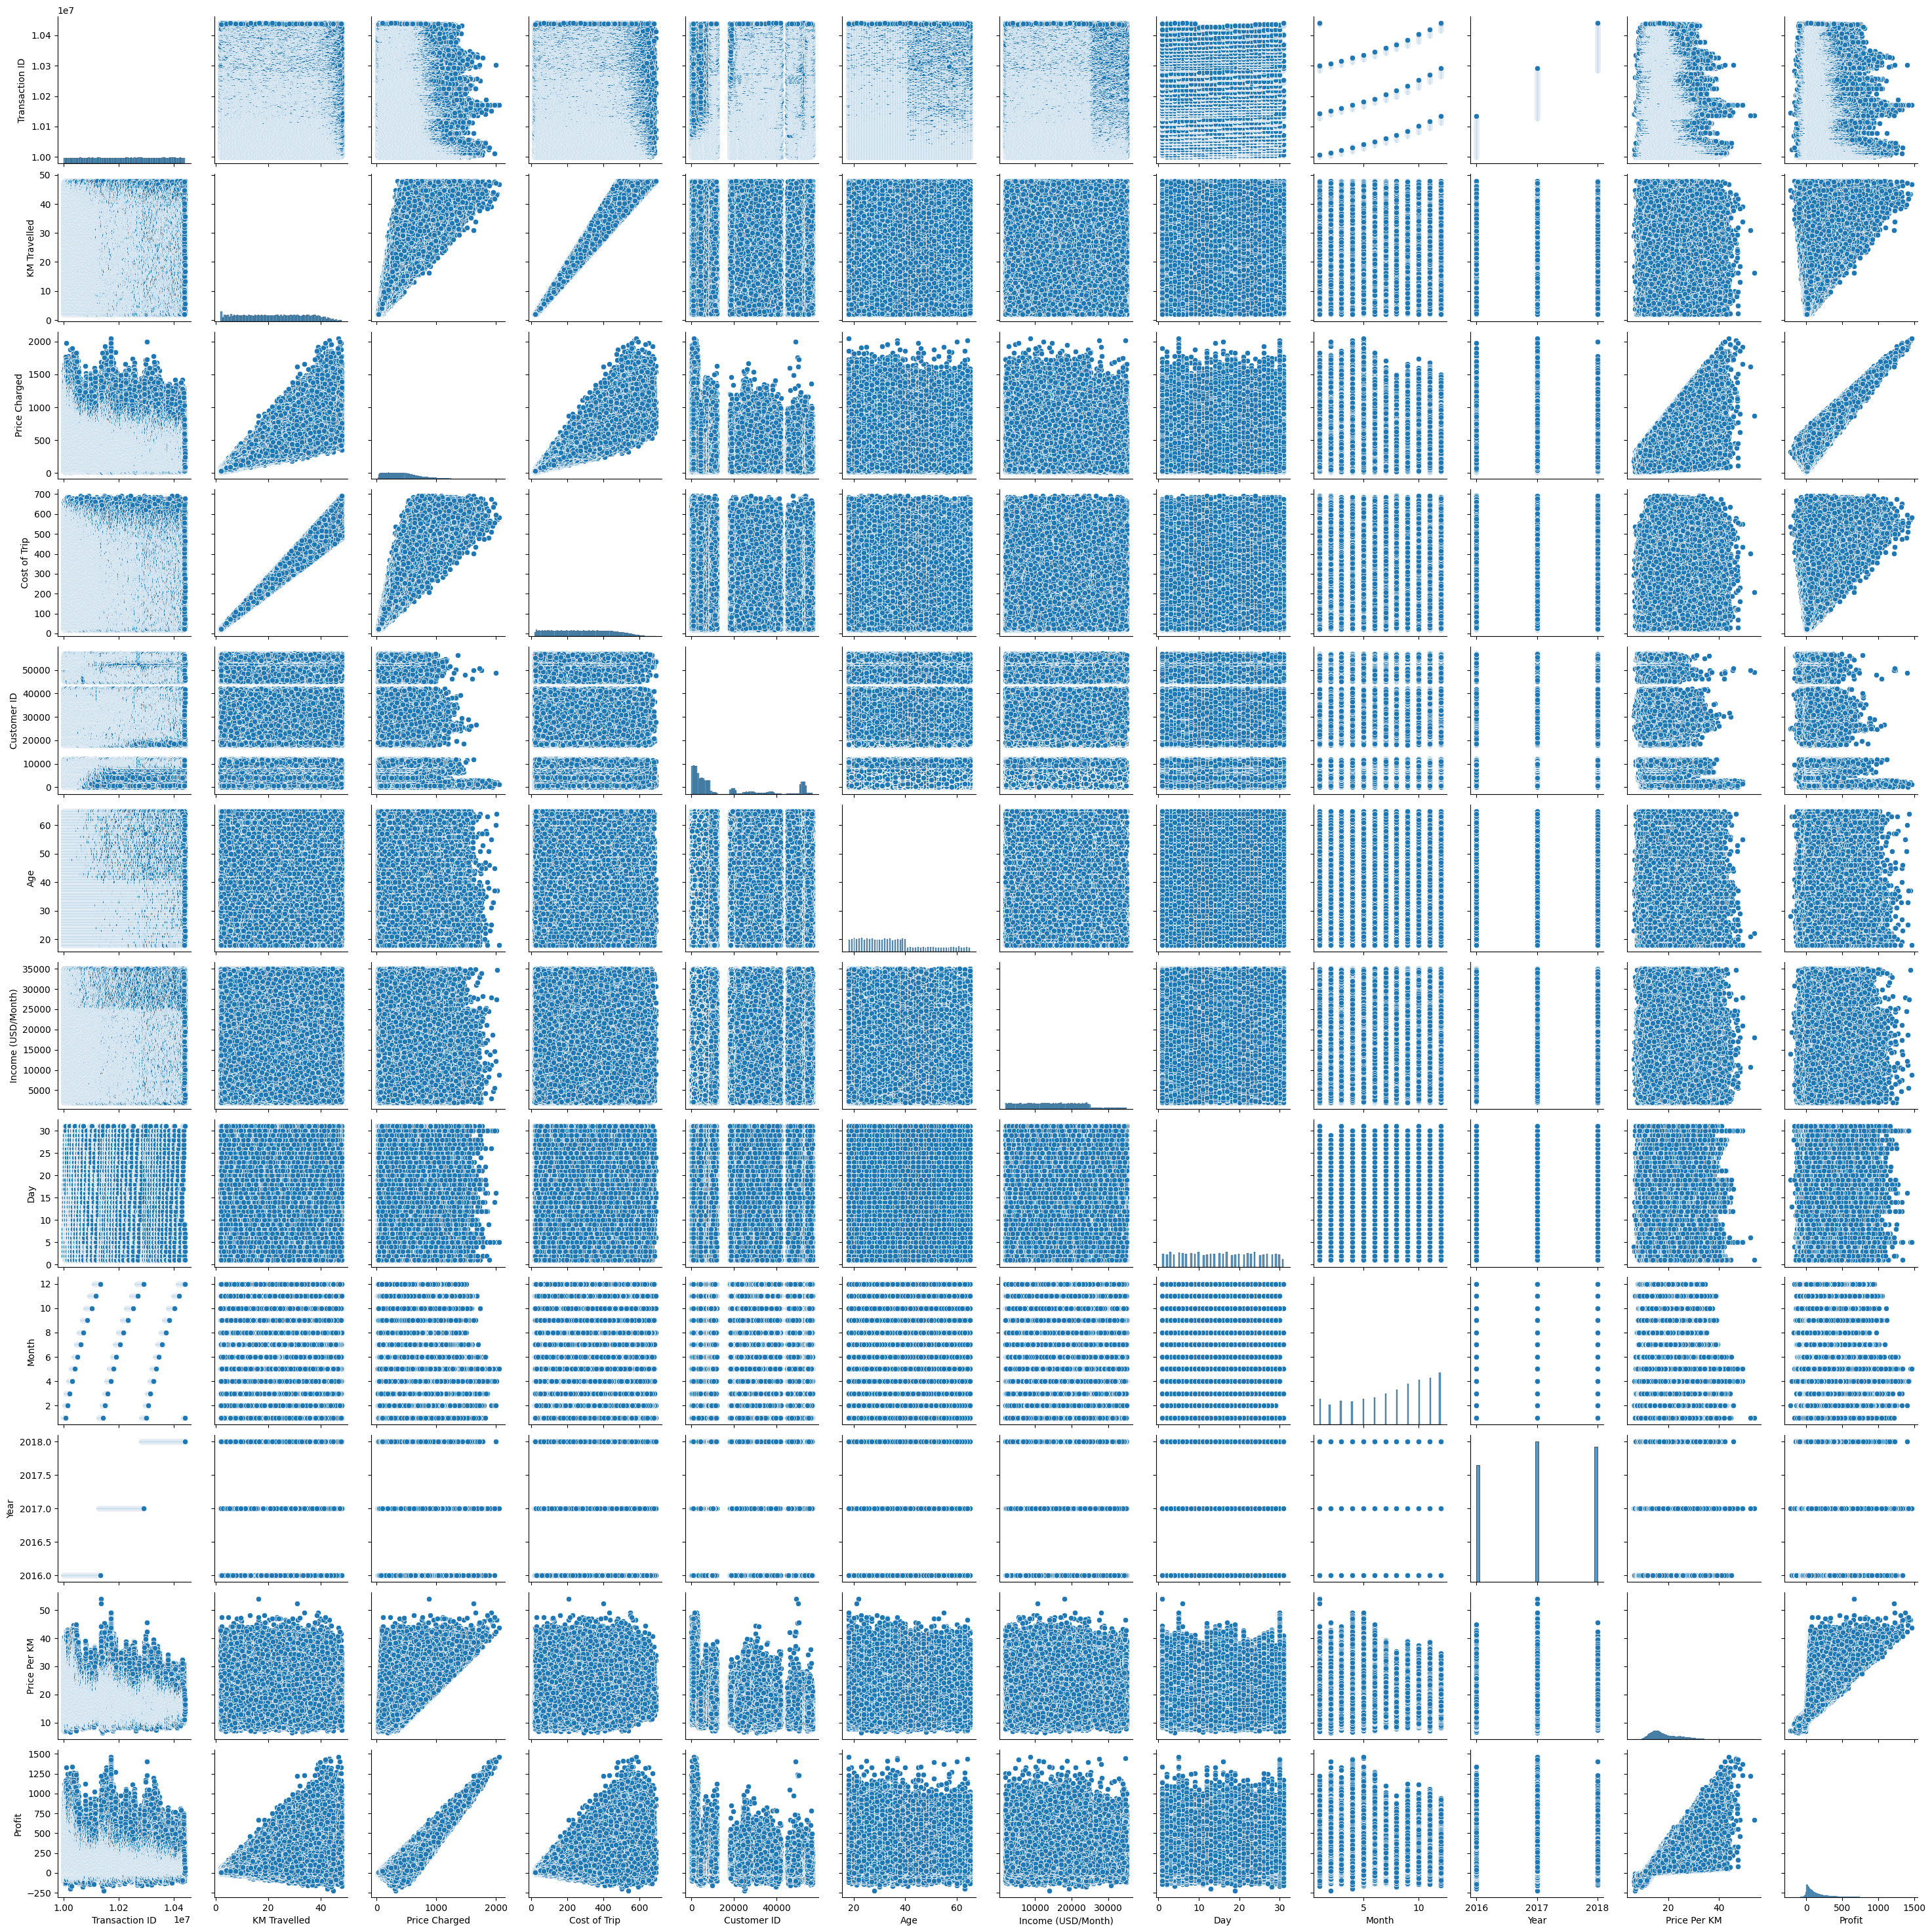

In [9]:
# Create a pair plot
sns.pairplot(df)
plt.savefig("visualization/pairplot.png")
plt.show()

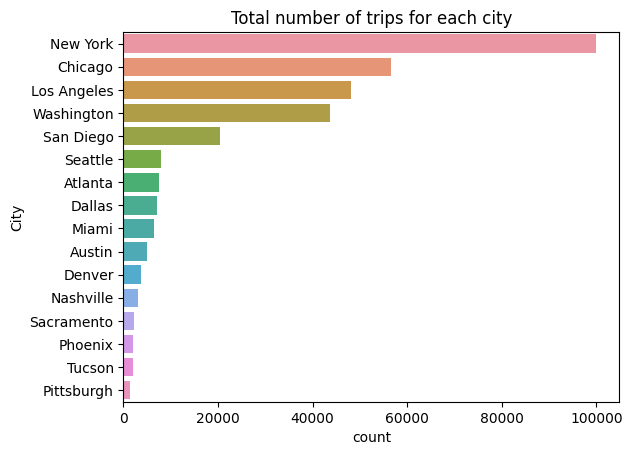

In [10]:
sns.countplot(data=df, y='City', order=df['City'].value_counts().index)
plt.title('Total number of trips for each city')
plt.savefig("visualization/Total number of trips for each city.png")
plt.show()

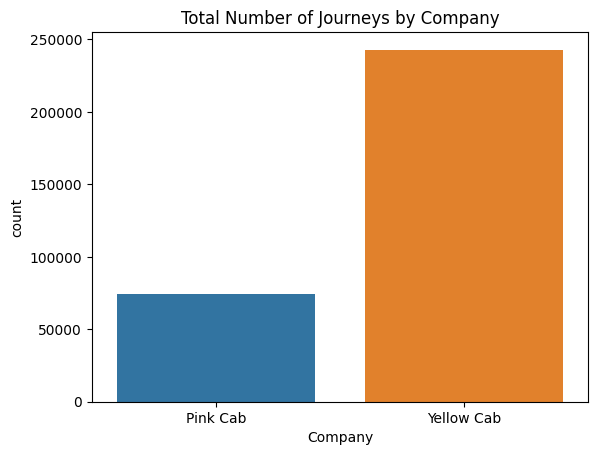

In [11]:
sns.countplot(data=df, x='Company')
plt.title('Total Number of Journeys by Company')
plt.savefig("visualization/Total Number of Journeys by Company.png")
plt.show()

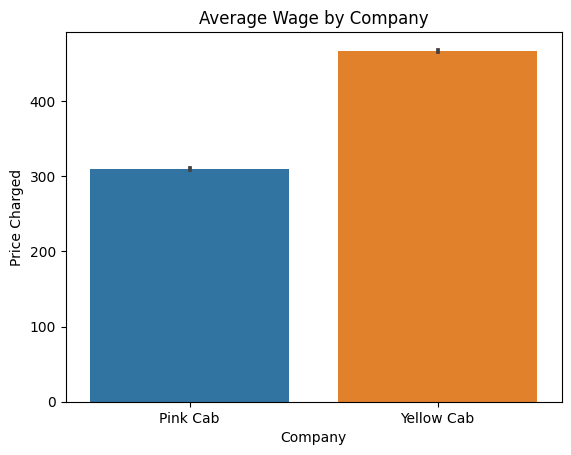

In [12]:
sns.barplot(data=df, x='Company', y='Price Charged')
plt.title('Average Wage by Company')
plt.savefig("visualization/Average Wage by Company.png")

plt.show()

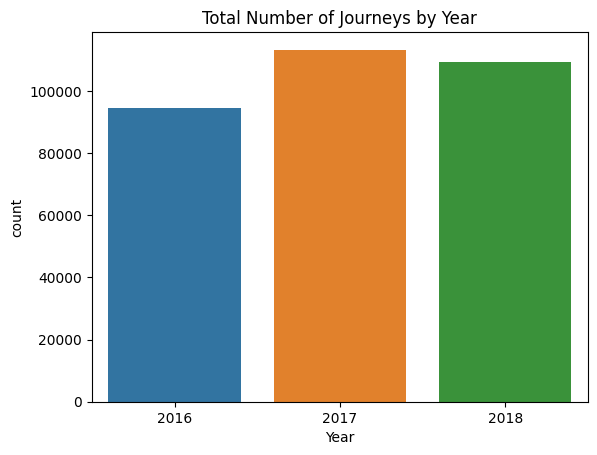

In [13]:
sns.countplot(data=df, x='Year')
plt.title('Total Number of Journeys by Year')
plt.savefig("visualization/Total Number of Journeys by Year.png")

plt.show()

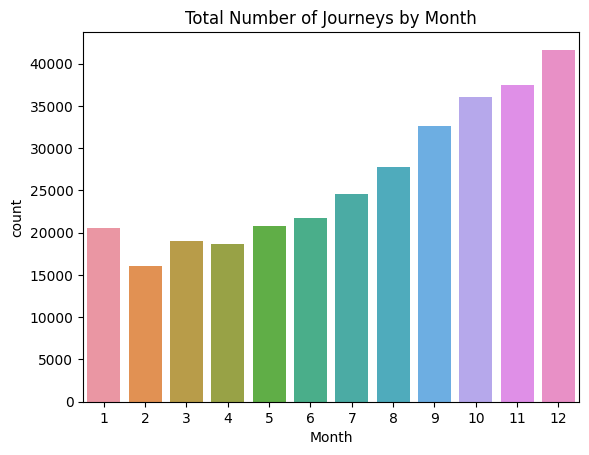

In [14]:
sns.countplot(data=df, x='Month')
plt.title('Total Number of Journeys by Month')
plt.savefig("visualization/Total Number of Journeys by Month.png")

plt.show()


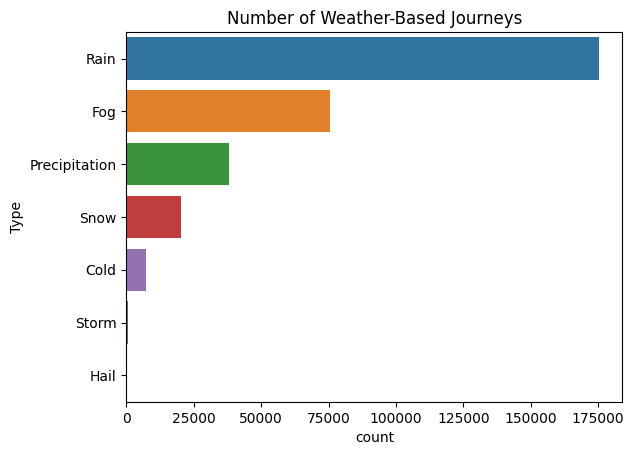

In [15]:
sns.countplot(data=df, y='Type', order=df['Type'].value_counts().index)
plt.title('Number of Weather-Based Journeys')
plt.savefig("visualization/Number of Weather-Based Journeys.png")

plt.show()

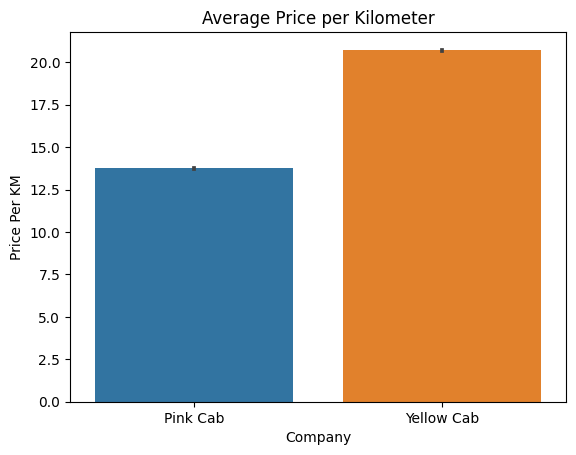

In [16]:
df['Price Per KM'] = df['Price Charged'] / df['KM Travelled']
sns.barplot(data=df, x='Company', y='Price Per KM')
plt.title('Average Price per Kilometer')
plt.savefig("visualization/Average Price per Kilometer.png")

plt.show()

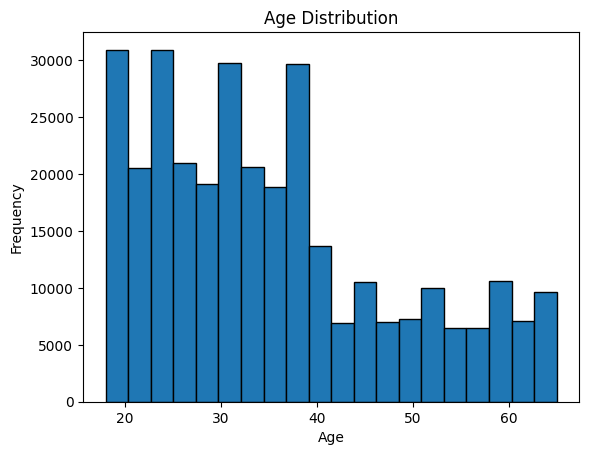

In [17]:
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("visualization/Age Distribution.png")

plt.show()

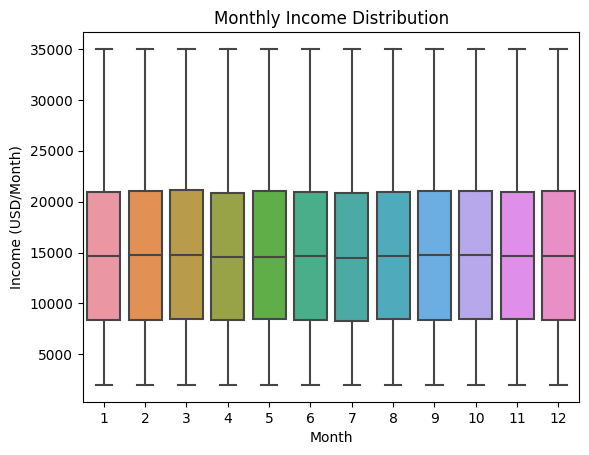

In [18]:
sns.boxplot(data=df, x='Month', y='Income (USD/Month)')
plt.title('Monthly Income Distribution')
plt.savefig("visualization/Monthly Income Distribution.png")

plt.show()

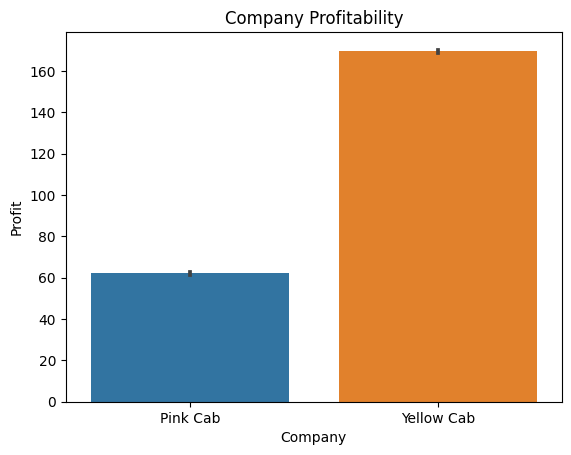

In [19]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
sns.barplot(data=df, x='Company', y='Profit')
plt.title('Company Profitability')
plt.savefig("visualization/Company Profitability.png")

plt.show()

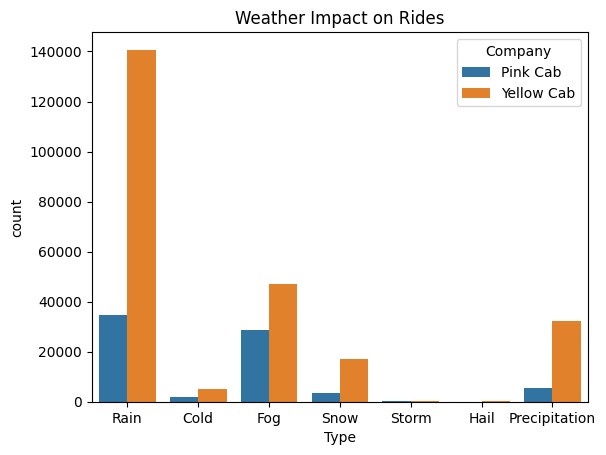

In [20]:
sns.countplot(data=df, x='Type', hue='Company')
plt.title('Weather Impact on Rides')
plt.savefig("visualization/Weather Impact on Rides.png")

plt.show()

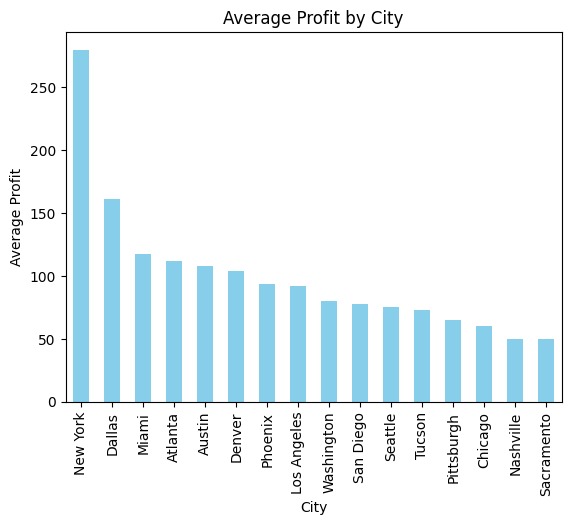

In [21]:
city_profit = df.groupby('City')['Profit'].mean().sort_values(ascending=False)
city_profit.plot(kind='bar', color='skyblue')
plt.title('Average Profit by City')
plt.ylabel('Average Profit')
plt.savefig("visualization/Average Profit by City.png")

plt.show()

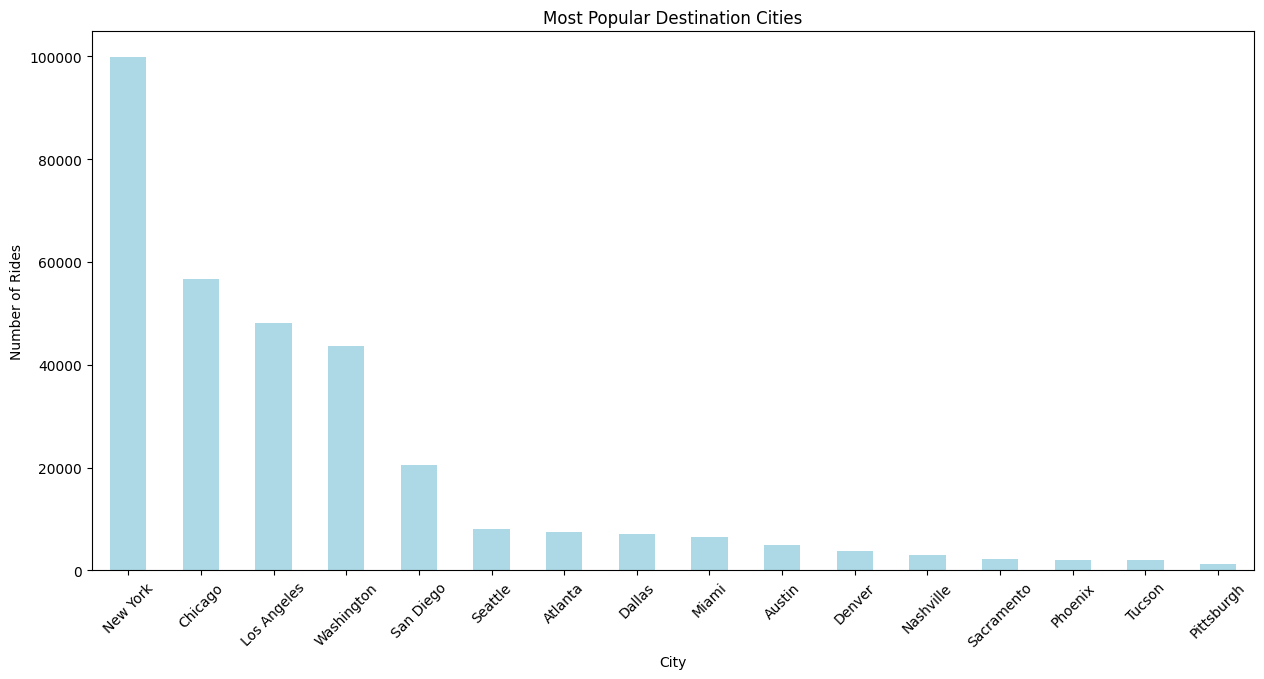

In [22]:
popular_destinations = df['City'].value_counts()

plt.figure(figsize=(15,7))
popular_destinations.plot(kind='bar', color='lightblue')
plt.title('Most Popular Destination Cities')
plt.ylabel('Number of Rides')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.savefig("visualization/Most Popular Destination Cities.png")

plt.show()

----------------

In [23]:
df['Year'] = pd.to_datetime(df['Date of Travel']).dt.year
df['Month'] = pd.to_datetime(df['Date of Travel']).dt.month

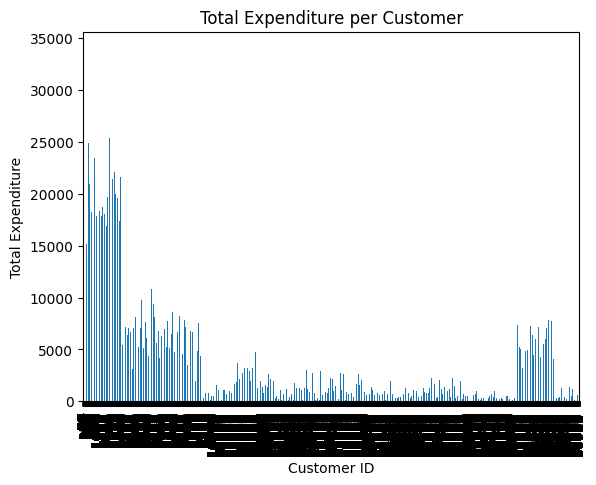

In [235]:
total_expenditure = df.groupby('Customer ID')['Price Charged'].sum()
total_expenditure.plot(kind='bar')
plt.title("Total Expenditure per Customer")
plt.ylabel("Total Expenditure")
plt.savefig("visualization/.png")

plt.show()

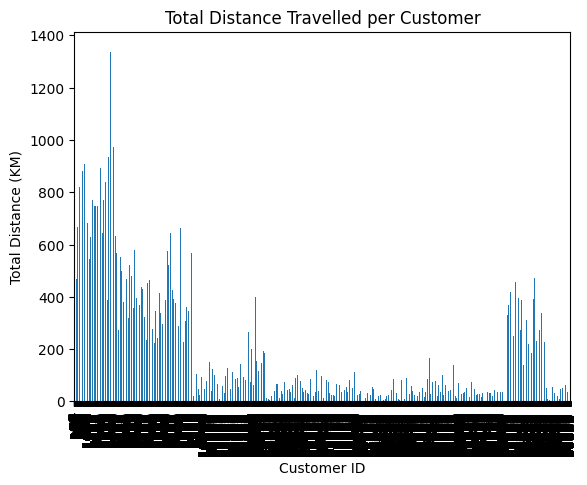

In [236]:
total_distance = df.groupby('Customer ID')['KM Travelled'].sum()
total_distance.plot(kind='bar')
plt.title("Total Distance Travelled per Customer")
plt.ylabel("Total Distance (KM)")
plt.show()

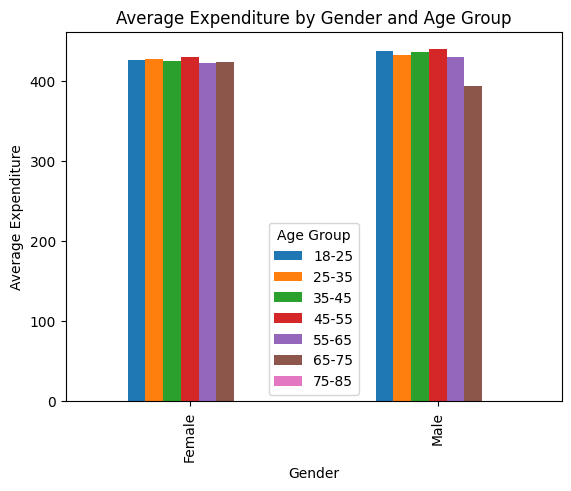

In [24]:
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

gender_age_group_expenditure = df.groupby(['Gender', 'Age Group'])['Price Charged'].mean()
gender_age_group_expenditure.unstack().plot(kind='bar')
plt.title("Average Expenditure by Gender and Age Group")
plt.ylabel("Average Expenditure")
plt.savefig("visualization/Average Expenditure by Gender and Age Group.png")

plt.show()


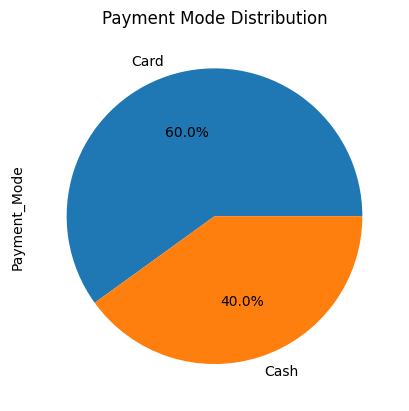

In [26]:
payment_mode_distribution = df['Payment_Mode'].value_counts()
payment_mode_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Mode Distribution")
plt.savefig("visualization/Payment Mode Distribution.png")

plt.show()


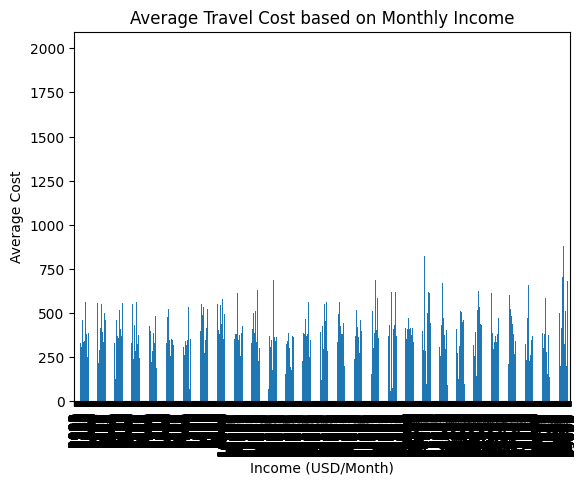

In [239]:
average_cost_income = df.groupby('Income (USD/Month)')['Price Charged'].mean()
average_cost_income.plot(kind='bar')
plt.title("Average Travel Cost based on Monthly Income")
plt.ylabel("Average Cost")
plt.show()


In [240]:
df.to_csv("df_last_one__saturday.csv", index=False)
df

Transaction ID Date of Travel     Company     City  KM Travelled  \
0             10000011     2016-01-08    Pink Cab  Atlanta         30.45   
1             10351127     2018-07-21  Yellow Cab  Atlanta         26.19   
2             10412921     2018-11-23  Yellow Cab  Atlanta         42.55   
3             10000012     2016-01-06    Pink Cab  Atlanta         28.62   
4             10320494     2018-04-21  Yellow Cab  Atlanta         36.38   
...                ...            ...         ...      ...           ...   
359386        10439766     2018-12-31  Yellow Cab  Seattle         21.42   
359387        10439790     2018-01-07  Yellow Cab  Seattle         16.66   
359389        10439838     2018-01-04  Yellow Cab   Tucson         19.00   
359390        10439840     2018-01-06  Yellow Cab   Tucson          5.60   
359391        10439846     2018-01-04  Yellow Cab   Tucson         13.30   

        Price Charged  Cost of Trip  Customer ID Payment_Mode  Gender  Age  \
0              370.95      313.6350        29290         Card    Male   28   
1              598.70      317.4228        29290         Cash    Male   28   
2              792.05      597.4020        29290         Card    Male   28   
3              358.52      334.8540        27703         Card    Male   27   
4              721.10      467.1192        27703         Card    Male   27   
...               ...           ...          ...          ...     ...  ...   
359386         342.33      275.0328        36141         Card  Female   21   
359387         261.18      213.9144        38520         Card  Female   42   
359389         303.77      232.5600        41414         Card    Male   38   
359390          92.42       70.5600        41677         Cash    Male   23   
359391         244.65      180.3480        39761         Card  Female   32   

        Income (USD/Month)  Day  Month  Year  Type  Price Per KM    Profit  \
0                    10813    8      1  2016  Rain     12.182266   57.3150   
1                    10813   21      7  2018  Rain     22.859870  281.2772   
2                    10813   23     11  2018  Rain     18.614571  194.6480   
3                     9237    6      1  2016  Rain     12.526904   23.6660   
4                     9237   21      4  2018  Rain     19.821330  253.9808   
...                    ...  ...    ...   ...   ...           ...       ...   
359386               14944   31     12  2018  Rain     15.981793   67.2972   
359387               19417    7      1  2018  Rain     15.677071   47.2656   
359389                3960    4      1  2018  Rain     15.987895   71.2100   
359390               19454    6      1  2018  Rain     16.503571   21.8600   
359391               10128    4      1  2018  Rain     18.394737   64.3020   

       Age Group  
0          25-35  
1          25-35  
2          25-35  
3          25-35  
4          25-35  
...          ...  
359386     18-25  
359387     35-45  
359389     35-45  
359390     18-25  
359391     25-35  

[317018 rows x 19 columns]

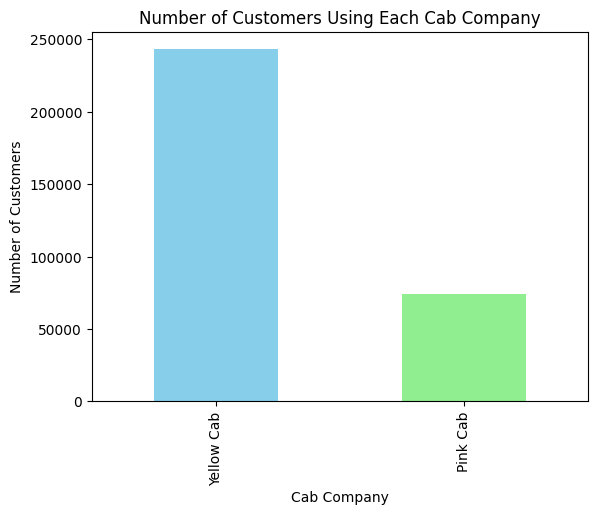

In [25]:
df['Company'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Number of Customers Using Each Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.savefig("visualization/Number of Customers Using Each Cab Company.png")

plt.show()

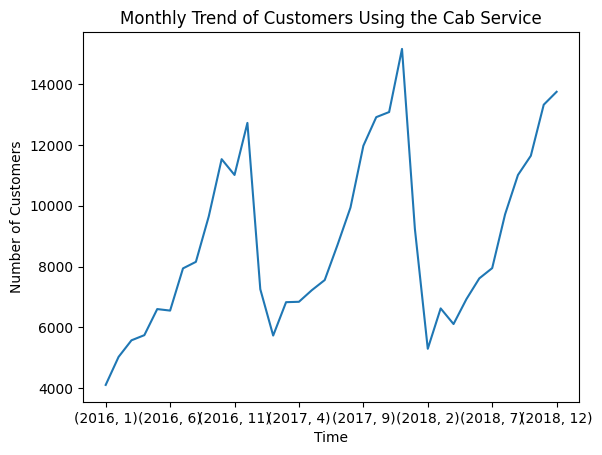

In [27]:
df.groupby(['Year', 'Month']).size().plot(kind='line')
plt.title('Monthly Trend of Customers Using the Cab Service')
plt.xlabel('Time')
plt.ylabel('Number of Customers')
plt.savefig("visualization/Monthly Trend of Customers Using the Cab Service.png")

plt.show()


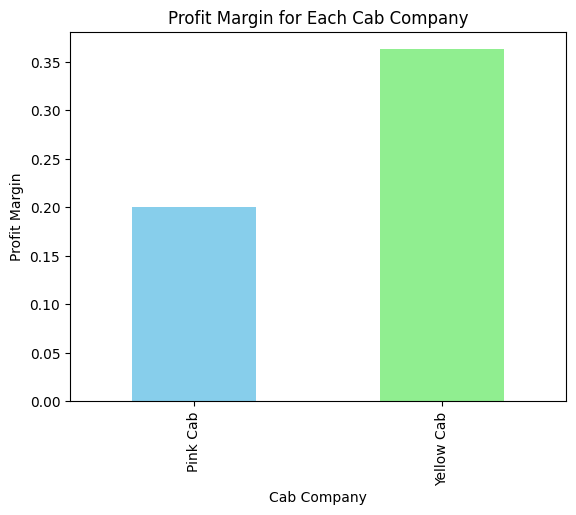

In [28]:
profit_margin = df.groupby('Company')['Profit'].sum() / df.groupby('Company')['Price Charged'].sum()
profit_margin.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Profit Margin for Each Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Profit Margin')
plt.savefig("visualization/Profit Margin for Each Cab Company.png")

plt.show()


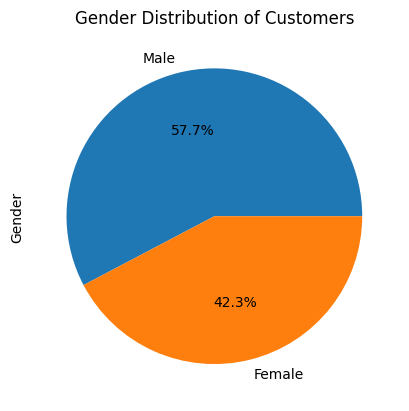

In [9]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()


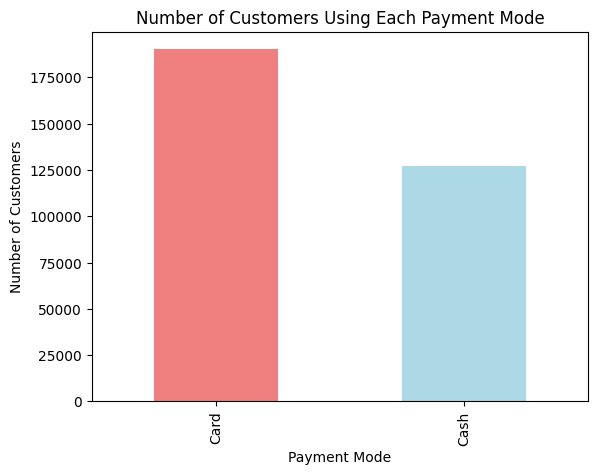

In [10]:
df['Payment_Mode'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Number of Customers Using Each Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customers')

plt.show()


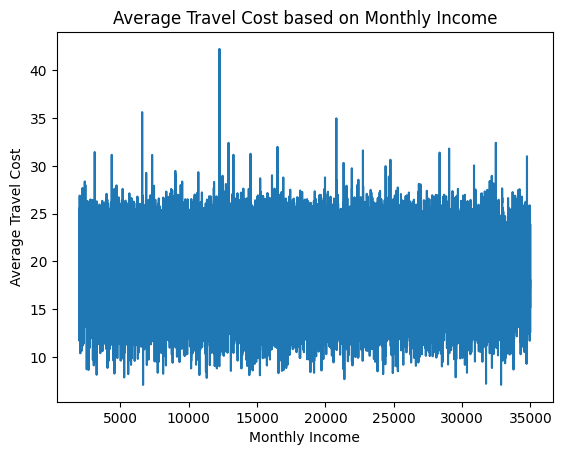

In [29]:
df.groupby('Income (USD/Month)')['Price Per KM'].mean().plot(kind='line')
plt.title('Average Travel Cost based on Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Average Travel Cost')
plt.savefig("visualization/Average Travel Cost based on Monthly Income.png")

plt.show()


--------------

# Recommender System

In [2]:
df = pd.read_csv("df_last_one__saturday.csv")

In [3]:
df

Transaction ID Date of Travel     Company     City  KM Travelled  \
0             10000011     2016-01-08    Pink Cab  Atlanta         30.45   
1             10351127     2018-07-21  Yellow Cab  Atlanta         26.19   
2             10412921     2018-11-23  Yellow Cab  Atlanta         42.55   
3             10000012     2016-01-06    Pink Cab  Atlanta         28.62   
4             10320494     2018-04-21  Yellow Cab  Atlanta         36.38   
...                ...            ...         ...      ...           ...   
317013        10439766     2018-12-31  Yellow Cab  Seattle         21.42   
317014        10439790     2018-01-07  Yellow Cab  Seattle         16.66   
317015        10439838     2018-01-04  Yellow Cab   Tucson         19.00   
317016        10439840     2018-01-06  Yellow Cab   Tucson          5.60   
317017        10439846     2018-01-04  Yellow Cab   Tucson         13.30   

        Price Charged  Cost of Trip  Customer ID Payment_Mode  Gender  Age  \
0              370.95      313.6350        29290         Card    Male   28   
1              598.70      317.4228        29290         Cash    Male   28   
2              792.05      597.4020        29290         Card    Male   28   
3              358.52      334.8540        27703         Card    Male   27   
4              721.10      467.1192        27703         Card    Male   27   
...               ...           ...          ...          ...     ...  ...   
317013         342.33      275.0328        36141         Card  Female   21   
317014         261.18      213.9144        38520         Card  Female   42   
317015         303.77      232.5600        41414         Card    Male   38   
317016          92.42       70.5600        41677         Cash    Male   23   
317017         244.65      180.3480        39761         Card  Female   32   

        Income (USD/Month)  Day  Month  Year  Type  Price Per KM    Profit  \
0                    10813    8      1  2016  Rain     12.182266   57.3150   
1                    10813   21      7  2018  Rain     22.859870  281.2772   
2                    10813   23     11  2018  Rain     18.614571  194.6480   
3                     9237    6      1  2016  Rain     12.526904   23.6660   
4                     9237   21      4  2018  Rain     19.821330  253.9808   
...                    ...  ...    ...   ...   ...           ...       ...   
317013               14944   31     12  2018  Rain     15.981793   67.2972   
317014               19417    7      1  2018  Rain     15.677071   47.2656   
317015                3960    4      1  2018  Rain     15.987895   71.2100   
317016               19454    6      1  2018  Rain     16.503571   21.8600   
317017               10128    4      1  2018  Rain     18.394737   64.3020   

       Age Group  
0          25-35  
1          25-35  
2          25-35  
3          25-35  
4          25-35  
...          ...  
317013     18-25  
317014     35-45  
317015     35-45  
317016     18-25  
317017     25-35  

[317018 rows x 19 columns]

-----------------

## How are companies by earnings?

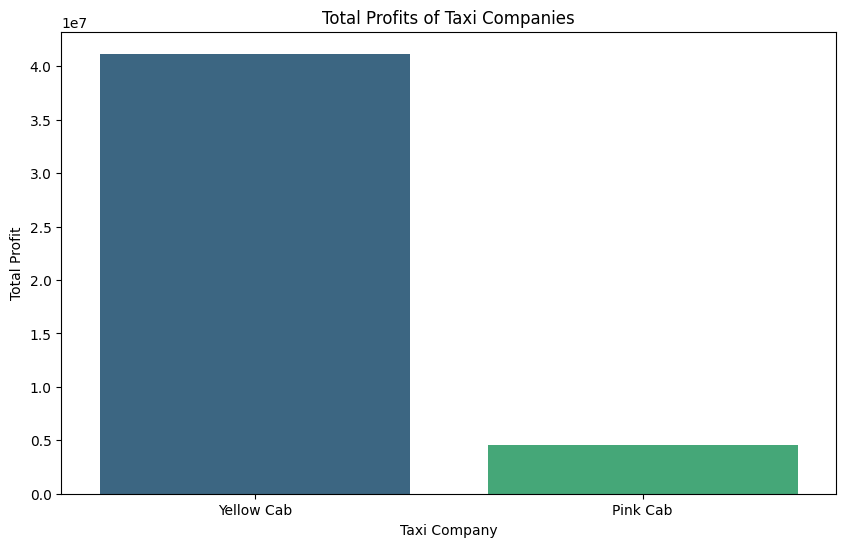

In [15]:
company_profit = df.groupby('Company')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=company_profit.index, y=company_profit.values, palette='viridis')
plt.title('Total Profits of Taxi Companies')
plt.ylabel('Total Profit')
plt.xlabel('Taxi Company')
plt.show()

------------------------

## Which demographic group uses taxis more often?

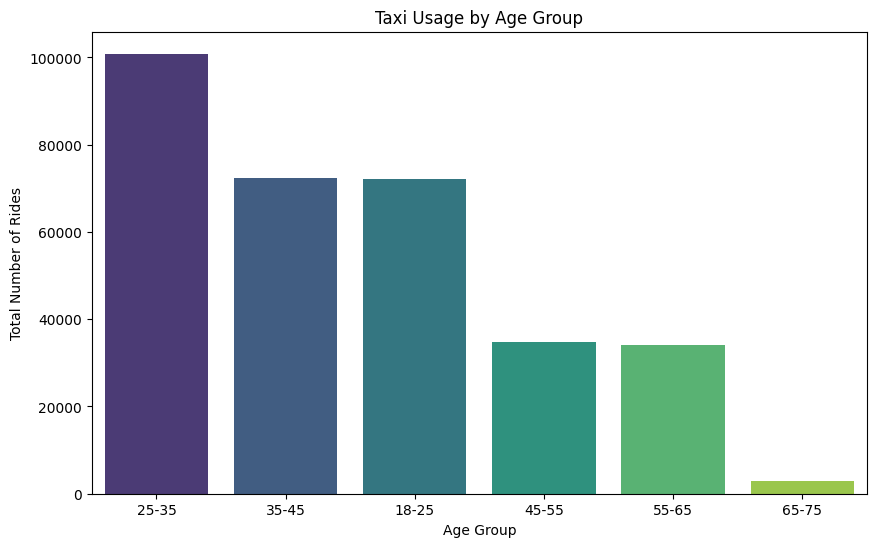

In [16]:
demographic_usage = df.groupby('Age Group')['Transaction ID'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=demographic_usage.index, y=demographic_usage.values, palette='viridis')
plt.title('Taxi Usage by Age Group')
plt.ylabel('Total Number of Rides')
plt.xlabel('Age Group')
plt.show()

----------------------------

## Which taxi company is more popular in which city?

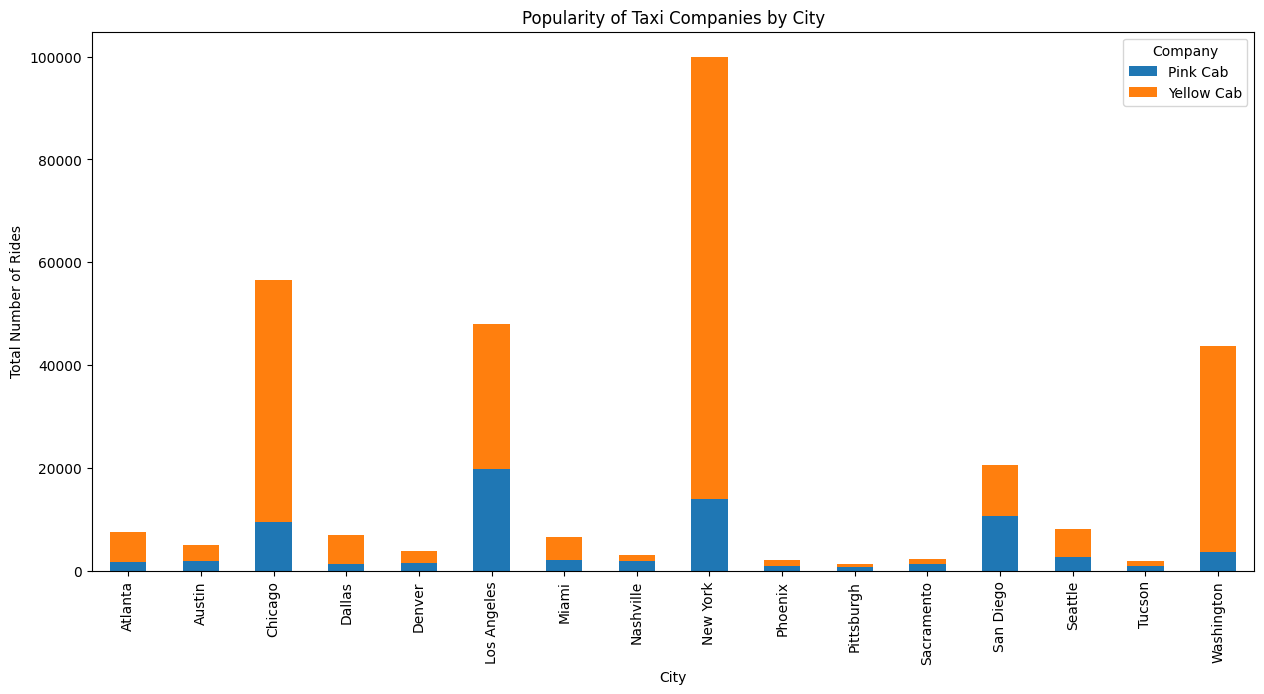

In [17]:
city_company_popularity = df.groupby(['City', 'Company'])['Transaction ID'].count().unstack()

city_company_popularity.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Popularity of Taxi Companies by City')
plt.ylabel('Total Number of Rides')
plt.xlabel('City')
plt.show()

-----------------

## Which age group uses taxis the most?

In [30]:
demographic_usage = df.groupby('Age Group')['Transaction ID'].count()
highest_usage_age_group = demographic_usage.idxmax()
highest_usage = demographic_usage.max()

highest_usage_age_group, highest_usage


('25-35', 100850)

In [31]:
demographic_usage_sorted = demographic_usage.sort_values(ascending=False)
demographic_usage_sorted


Age Group
25-35    100850
35-45     72419
18-25     72027
45-55     34819
55-65     33987
65-75      2916
75-85         0
Name: Transaction ID, dtype: int64

-----------------

##  In which city is the Pink Cab company more popular than the Yellow Cab company?

In [32]:
city_company_popularity = df[df['Company'] == 'Pink Cab'].groupby('City')['Transaction ID'].count()
city_yellow_popularity = df[df['Company'] == 'Yellow Cab'].groupby('City')['Transaction ID'].count()

cities_where_pink_more_popular = city_company_popularity[city_company_popularity > city_yellow_popularity].index.tolist()
cities_where_pink_more_popular


['Nashville', 'Pittsburgh', 'Sacramento', 'San Diego']

In [33]:
city_company_popularity_sorted = city_company_popularity.sort_values(ascending=False)
city_yellow_popularity_sorted = city_yellow_popularity.sort_values(ascending=False)

city_company_popularity_sorted, city_yellow_popularity_sorted


(City
 Los Angeles    19865
 New York       13967
 San Diego      10672
 Chicago         9361
 Washington      3692
 Seattle         2732
 Miami           2002
 Austin          1868
 Nashville       1841
 Atlanta         1762
 Denver          1394
 Dallas          1380
 Sacramento      1288
 Phoenix          820
 Tucson           799
 Pittsburgh       682
 Name: Transaction ID, dtype: int64,
 City
 New York       85918
 Chicago        47264
 Washington     40045
 Los Angeles    28168
 San Diego       9816
 Atlanta         5795
 Dallas          5637
 Seattle         5265
 Miami           4452
 Austin          3028
 Denver          2431
 Nashville       1169
 Phoenix         1145
 Tucson          1132
 Sacramento       997
 Pittsburgh       631
 Name: Transaction ID, dtype: int64)

------------------

## Which payment mode is more popular among customers?

In [35]:
payment_mode_popularity = df.groupby('Payment_Mode')['Transaction ID'].count()
most_popular_payment_mode = payment_mode_popularity.idxmax()
number_of_transactions = payment_mode_popularity.max()

most_popular_payment_mode, number_of_transactions


('Card', 190091)

In [36]:
payment_mode_popularity_sorted = payment_mode_popularity.sort_values(ascending=False)
payment_mode_popularity_sorted

Payment_Mode
Card    190091
Cash    126927
Name: Transaction ID, dtype: int64

-------------------------

## Which gender predominates in taxi usage?

In [37]:
gender_usage = df.groupby('Gender')['Transaction ID'].count()
predominant_gender = gender_usage.idxmax()
gender_usage_count = gender_usage.max()

predominant_gender, gender_usage_count


('Male', 182962)

In [38]:
gender_usage_sorted = gender_usage.sort_values(ascending=False)
gender_usage_sorted


Gender
Male      182962
Female    134056
Name: Transaction ID, dtype: int64

--------------------

## During which months do people use taxis the most?

In [39]:
df['Month'] = pd.to_datetime(df['Date of Travel']).dt.month
month_usage = df.groupby('Month')['Transaction ID'].count()
peak_month = month_usage.idxmax()
peak_month_usage = month_usage.max()

peak_month, peak_month_usage


(12, 41649)

In [40]:
month_usage_sorted = month_usage.sort_values(ascending=False)
month_usage_sorted


Month
12    41649
11    37430
10    36102
9     32641
8     27813
7     24604
6     21711
5     20744
1     20589
3     19014
4     18682
2     16039
Name: Transaction ID, dtype: int64

--------------------------

## In which city is taxi usage the least?

In [42]:
city_usage = df.groupby('City')['Transaction ID'].count()
least_used_city = city_usage.idxmin()
city_usage_count = city_usage.min()

least_used_city, city_usage_count


('Pittsburgh', 1313)

In [43]:
city_usage_sorted = city_usage.sort_values()
city_usage_sorted

City
Pittsburgh      1313
Tucson          1931
Phoenix         1965
Sacramento      2285
Nashville       3010
Denver          3825
Austin          4896
Miami           6454
Dallas          7017
Atlanta         7557
Seattle         7997
San Diego      20488
Washington     43737
Los Angeles    48033
Chicago        56625
New York       99885
Name: Transaction ID, dtype: int64

---------------------

# Conclusion

## By closely examining taxi usage patterns, demographic preferences, and company ratings, XYZ company can make informed decisions about their investments in the taxi industry. The data-driven insights provided above offer a comprehensive understanding of current market dynamics.